In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Visualization

### Load Data

In [7]:
df = pd.read_csv('cleaned_hospital.csv')

### Plotting

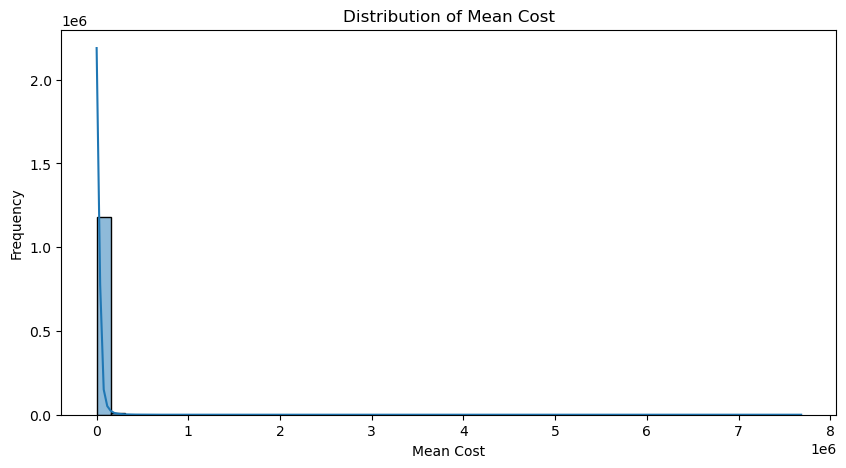

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Mean Cost'], bins=50, kde=True)
plt.title('Distribution of Mean Cost')
plt.xlabel('Mean Cost')
plt.ylabel('Frequency')
plt.show()

**Distribution of Mean Cost**

- From the distribution of mean cost, we observed that the data is **highly right-skewed**, indicating that the majority of hospital discharges are associated with moderate mean costs. 

- A small proportion of discharges have **significantly higher costs**, likely due to complex medical procedures, severe illnesses, or specialized care.

- This long-tail distribution could **impact model performance** by introducing sensitivity to outliers.

- Therefore, we decided to apply a **log transformation** to the **mean cost** to stabilize variance, reduce skewness, and improve model robustness.

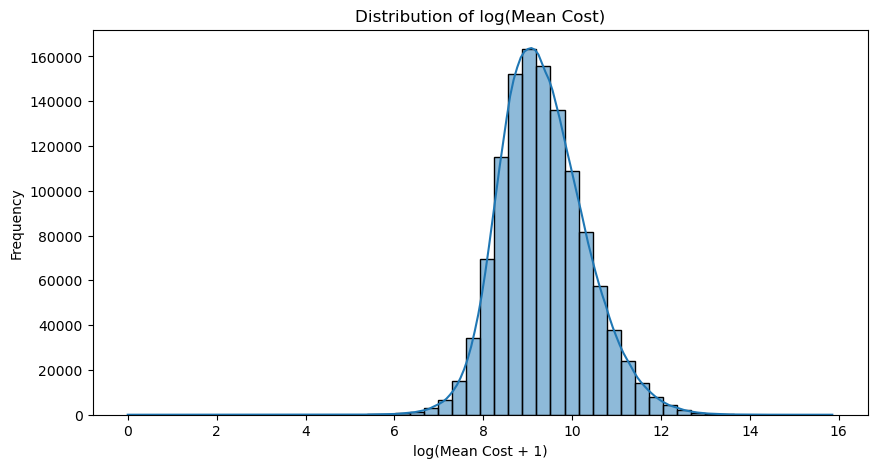

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['Mean Cost']), bins=50, kde=True)
plt.title('Distribution of log(Mean Cost)')
plt.xlabel('log(Mean Cost + 1)')
plt.ylabel('Frequency')
plt.show()

**Distribution of Mean Cost**

After applying a log transformation to the mean cost, the distribution appears approximately normal.

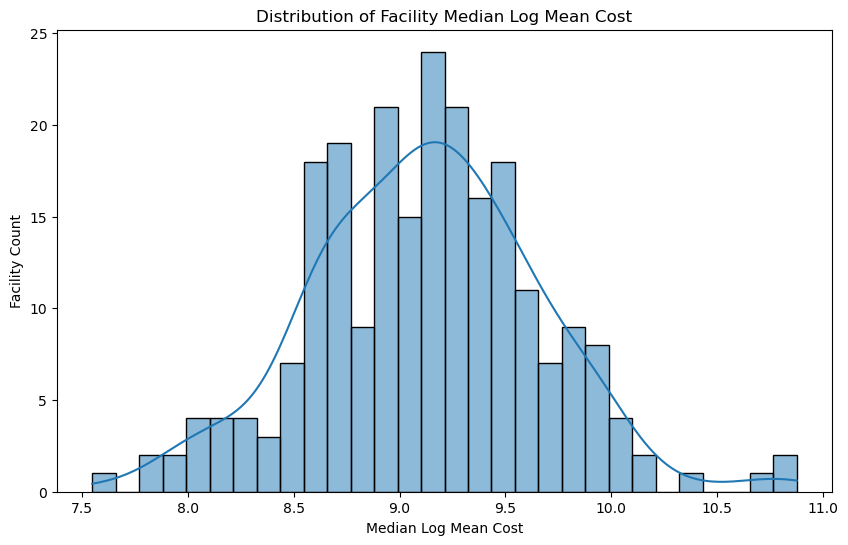

In [ ]:
# Group by Facility Id and compute median log cost
facility_median_cost = df.groupby('Facility Id')['Mean Cost'].median()
facility_median_log_cost = np.log1p(facility_median_cost)

plt.figure(figsize=(10,6))
sns.histplot(facility_median_log_cost, kde=True, bins=30)
plt.title('Distribution of Facility Median Log Mean Cost')
plt.xlabel('Median Log Mean Cost')
plt.ylabel('Facility Count')
plt.show()


### Distribution of Facility Median Log Mean Cost

- Most facilities have a median log mean cost between 8.5 and 9.5.
- The distribution is fairly symmetric with slight right skewness, suggesting a few facilities have relatively higher median costs.

Facility Id captures important hospital-specific effects and should be included as a feature in the model.

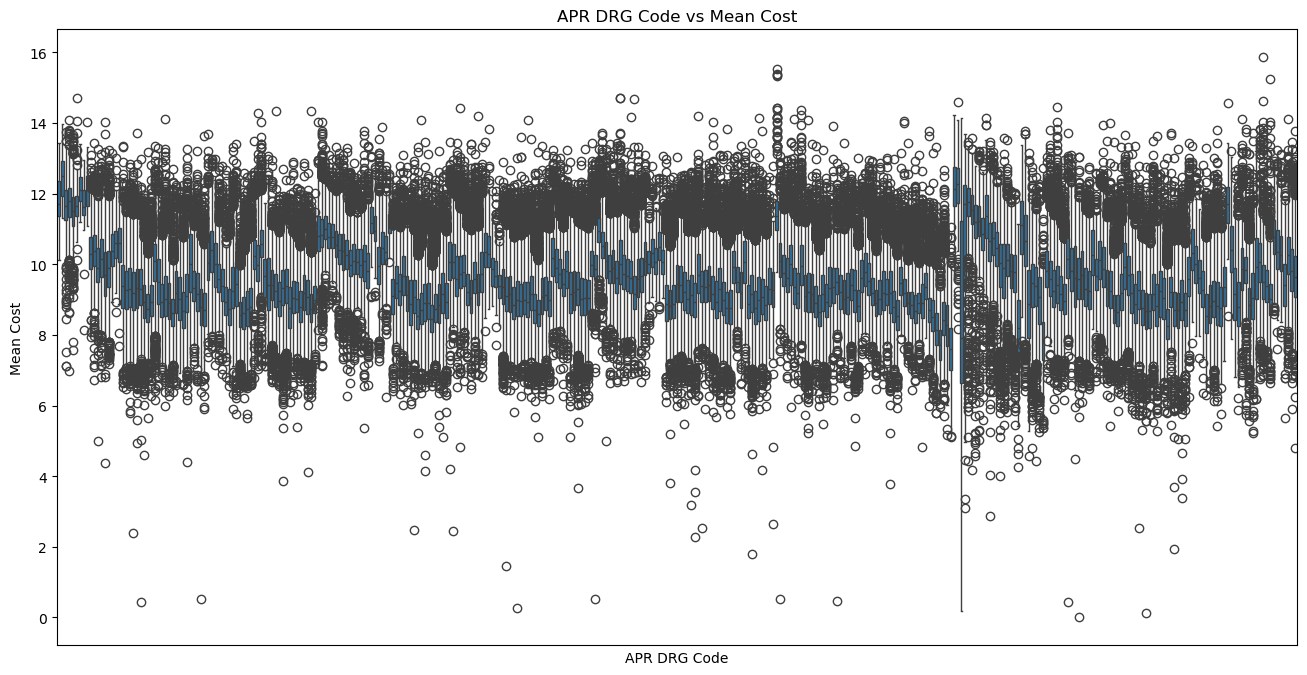

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='APR DRG Code', y=np.log1p(df['Mean Cost']), data=df)
plt.xticks([], [])
plt.title('APR DRG Code vs log(Mean Cost)')
plt.show()


### The Cost Distributions for Different APR DRG Code

* box heights and medians for different APR DRG Codes are **different**, indicating that the **APR DRG does affect the Mean Cost**.
* Some APR DRG Codes are more expensive overall, with higher medians; some are cheaper overall, with lower medians.
* The costs of some cases within single APR DRG Code also fluctuate greatly. We should consider **special treatment** for cases with extreme costs.

APR DRG Code should be added to the model as an important feature.

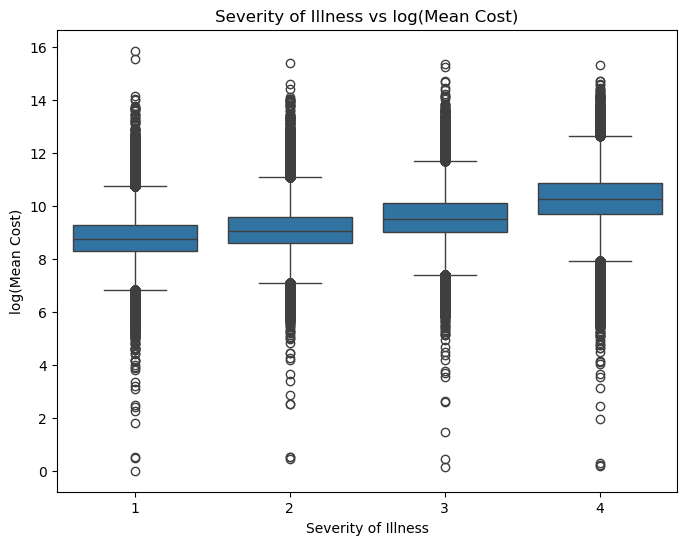

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='APR Severity of Illness Code', y=np.log1p(df['Mean Cost']), data=df)
plt.title('Severity of Illness vs log(Mean Cost)')
plt.xlabel('Severity of Illness')
plt.ylabel('log(Mean Cost)')
plt.show()

### The Cost Distributions for Different Severity of Illness

- We observed a **positive relation**: higher severity levels are associated with higher median log mean costs.
- However, substantial overlap exists across severity levels, suggesting that severity alone **does not fully explain** cost variations.
- **Outliers** are present across all severity levels, indicating variability in **patient-specific** costs within the same severity group.

Severity of Illness should be added to the model as an important feature.

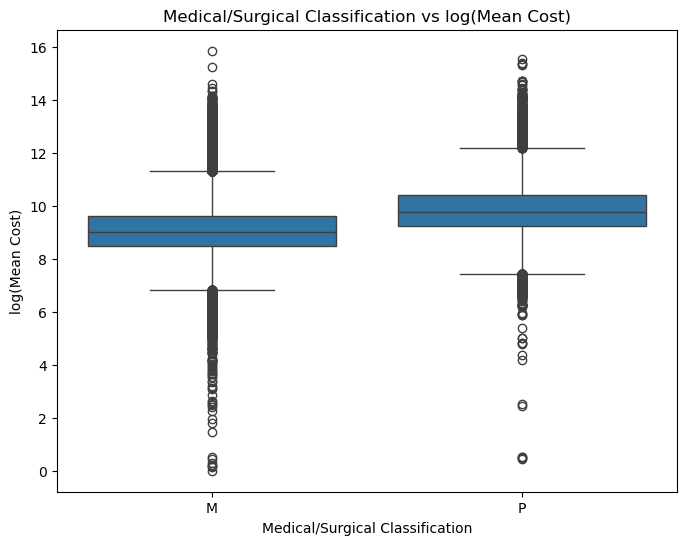

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='APR Medical Surgical Code', y=np.log1p(df['Mean Cost']), data=df)
plt.title('Medical/Surgical Classification vs log(Mean Cost)')
plt.xlabel('Medical/Surgical Classification')
plt.ylabel('log(Mean Cost)')
plt.show()

### The Cost Distributions for Medical/Surgical Classificatione

- Surgical (P) cases tend to have slightly higher median log mean costs compared to Medical (M) cases.
- Both classifications show considerable variability and outliers within their cost distributions.
  
Medical/Surgical should be added to the model as an important feature.

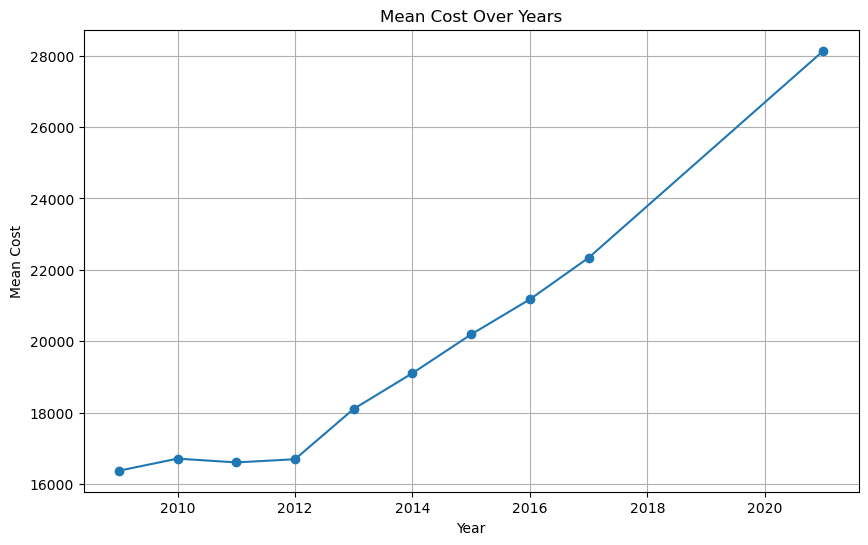

In [14]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Mean Cost'].mean().plot(marker='o')
plt.title('Mean Cost Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Cost')
plt.grid(True)
plt.show()

### Mean Cost Over Years

- Mean cost shows a slow upward trend from 2009 to 2012, and a sharper increase beginning around 2013.
- The trend appears approximately linear after 2012, suggesting consistent annual cost growth.

Year should be included as a feature in modeling to account for temporal cost inflation.
